# Validation of Trained Models

In [2]:
import os
import torch

# Set-up CUDA device
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID" 
# use a specific GPU
os.environ["CUDA_VISIBLE_DEVICES"]="4"

# Use GPU for inference
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Print the device being used
print(f"Using device: {device}")

# Check the GPU name
if device.type == 'cuda':
    gpu_name = torch.cuda.get_device_name(0)  # 0 because CUDA_VISIBLE_DEVICES=4 means GPU 4 is now 0
    print("Using GPU:", gpu_name)

Using device: cuda
Using GPU: NVIDIA A100-SXM4-40GB


In [ ]:
# COMPILE MODEL WEIGHTS IN ONE DIRECTORY
# import os
# import shutil


# # List of general folders
# folder_paths = ["YOLO11-freeze-all", "YOLO11-freeze-backbone", "YOLO11-full"]
# destination_dir = "best_weights"

# # List to store paths to the weights
# weights_paths = []

# # Iterate through each folder
# for folder_path in folder_paths:
#     # Recursively find the target file
#     for root, dirs, files in os.walk(folder_path):
#         if "best.pt" in files:
#             folder_name = folder_path.replace("YOLO11-", "-")
#             new_name = os.path.basename(os.path.dirname(root)).replace("-train", "") + folder_name  + ".pt"

#             source_file = os.path.join(root, "best.pt")
#             destination_file = os.path.join(destination_dir, new_name)

#             shutil.copy(source_file, destination_file)

In [21]:
import os

# List of general folders
folder_path = "best_weights"

# Get all weights in folder_path
weights_paths = os.listdir(folder_path)
weights_paths = [folder_path + '/' + path for path in weights_paths]

for path in weights_paths:
    print(path)

best_weights/yolo11m-seg-freeze-all.pt
best_weights/yolo11m-freeze-backbone.pt
best_weights/yolo11s-seg-full.pt
best_weights/yolo11s-seg-freeze-all.pt
best_weights/yolo11m-full.pt
best_weights/yolo11s-freeze-backbone.pt
best_weights/yolo11l-seg-freeze-all.pt
best_weights/yolo11m-freeze-all.pt
best_weights/yolo11n-seg-freeze-backbone.pt
best_weights/yolo11s-freeze-all.pt
best_weights/yolo11l-seg-freeze-backbone.pt
best_weights/yolo11n-full.pt
best_weights/yolo11n-seg-full.pt
best_weights/yolo11s-seg-freeze-backbone.pt
best_weights/yolo11n-freeze-all.pt
best_weights/yolo11l-full.pt
best_weights/yolo11n-seg-freeze-all.pt
best_weights/yolo11s-full.pt
best_weights/yolo11l-freeze-all.pt
best_weights/yolo11m-seg-full.pt
best_weights/yolo11m-seg-freeze-backbone.pt
best_weights/yolo11l-freeze-backbone.pt
best_weights/yolo11l-seg-full.pt
best_weights/yolo11n-freeze-backbone.pt


## Evaluate Models

In [22]:
from ultralytics import YOLO

detect_metrics = []
segment_metrics = []

for weights_path in weights_paths:
    model = YOLO(weights_path, task="detect")
    metrics = model.val(device=device, verbose=False)
    detect_metrics.append(metrics)

    del model
    del metrics

for weights_path in weights_paths:
    if "seg" in weights_path:
        model = YOLO(weights_path, task="segment")
        metrics = model.val(device=device, verbose=False)
        segment_metrics.append(metrics)

        del model
        del metrics
        

YOLO11m-seg summary (fused): 330 layers, 22,353,816 parameters, 0 gradients, 123.1 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:21<00:00,  3.20it/s]


                   all       1119       2301      0.837      0.738      0.827      0.692       0.83      0.732      0.815      0.664
Speed: 0.2ms preprocess, 2.6ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/segment/val42
YOLO11m summary (fused): 303 layers, 20,048,536 parameters, 0 gradients, 67.7 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:06<00:00, 11.36it/s]


                   all       1119       2301      0.954      0.936      0.965      0.888
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/val26
YOLO11s-seg summary (fused): 265 layers, 10,076,104 parameters, 0 gradients, 35.4 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:12<00:00,  5.72it/s]


                   all       1119       2301      0.952      0.946       0.97       0.89      0.947      0.946      0.963      0.848
Speed: 0.1ms preprocess, 1.5ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/segment/val43
YOLO11s-seg summary (fused): 265 layers, 10,076,104 parameters, 0 gradients, 35.4 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:07<00:00,  9.57it/s]


                   all       1119       2301      0.794      0.662      0.756      0.617      0.789      0.654      0.742      0.582
Speed: 0.1ms preprocess, 1.3ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/segment/val44
YOLO11m summary (fused): 303 layers, 20,048,536 parameters, 0 gradients, 67.7 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:06<00:00, 11.07it/s]


                   all       1119       2301      0.959      0.949       0.97        0.9
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/val27
YOLO11s summary (fused): 238 layers, 9,422,088 parameters, 0 gradients, 21.4 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:05<00:00, 13.83it/s]


                   all       1119       2301      0.948       0.92      0.959      0.864
Speed: 0.1ms preprocess, 1.0ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/val28
YOLO11l-seg summary (fused): 491 layers, 27,603,096 parameters, 0 gradients, 142.0 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:09<00:00,  7.58it/s]


                   all       1119       2301      0.862      0.754       0.85      0.718       0.86       0.75      0.839      0.683
Speed: 0.1ms preprocess, 3.2ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/segment/val45
YOLO11m summary (fused): 303 layers, 20,048,536 parameters, 0 gradients, 67.7 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:06<00:00, 11.09it/s]


                   all       1119       2301      0.819      0.746      0.826      0.685
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/val29
YOLO11n-seg summary (fused): 265 layers, 2,839,248 parameters, 0 gradients, 10.2 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:16<00:00,  4.24it/s]


                   all       1119       2301      0.938      0.884      0.939      0.824      0.934      0.879       0.93      0.772
Speed: 0.1ms preprocess, 1.1ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/segment/val46
YOLO11s summary (fused): 238 layers, 9,422,088 parameters, 0 gradients, 21.4 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:05<00:00, 13.59it/s]


                   all       1119       2301       0.79       0.67      0.763      0.622
Speed: 0.1ms preprocess, 1.0ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/val30
YOLO11l-seg summary (fused): 491 layers, 27,603,096 parameters, 0 gradients, 142.0 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:09<00:00,  7.35it/s]


                   all       1119       2301      0.952      0.938      0.966      0.895      0.949      0.936      0.962      0.855
Speed: 0.1ms preprocess, 3.2ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/segment/val47
YOLO11n summary (fused): 238 layers, 2,586,832 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:06<00:00, 11.35it/s]


                   all       1119       2301      0.944      0.928      0.962      0.862
Speed: 0.1ms preprocess, 0.7ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/val31
YOLO11n-seg summary (fused): 265 layers, 2,839,248 parameters, 0 gradients, 10.2 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:06<00:00, 10.29it/s]


                   all       1119       2301      0.948      0.921      0.962      0.865       0.95      0.916      0.954      0.814
Speed: 0.2ms preprocess, 0.8ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/segment/val48
YOLO11s-seg summary (fused): 265 layers, 10,076,104 parameters, 0 gradients, 35.4 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:28<00:00,  2.44it/s]


                   all       1119       2301      0.944      0.913      0.958      0.866      0.942      0.908      0.951      0.815
Speed: 0.2ms preprocess, 1.3ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/segment/val49
YOLO11n summary (fused): 238 layers, 2,586,832 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:09<00:00,  7.24it/s]


                   all       1119       2301      0.699      0.584      0.646      0.521
Speed: 0.1ms preprocess, 0.7ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/val32
YOLO11l summary (fused): 464 layers, 25,297,816 parameters, 0 gradients, 86.7 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:07<00:00,  9.80it/s]


                   all       1119       2301      0.955      0.954      0.974      0.907
Speed: 0.1ms preprocess, 2.6ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val33
YOLO11n-seg summary (fused): 265 layers, 2,839,248 parameters, 0 gradients, 10.2 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:07<00:00,  9.33it/s]


                   all       1119       2301      0.706      0.583      0.647       0.52      0.731      0.559      0.636      0.489
Speed: 0.2ms preprocess, 0.9ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/segment/val50
YOLO11s summary (fused): 238 layers, 9,422,088 parameters, 0 gradients, 21.4 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:05<00:00, 12.64it/s]


                   all       1119       2301      0.963       0.94      0.971      0.886
Speed: 0.1ms preprocess, 1.2ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val34
YOLO11l summary (fused): 464 layers, 25,297,816 parameters, 0 gradients, 86.7 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:06<00:00, 10.17it/s]


                   all       1119       2301      0.848      0.763      0.841      0.708
Speed: 0.1ms preprocess, 2.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val35
YOLO11m-seg summary (fused): 330 layers, 22,353,816 parameters, 0 gradients, 123.1 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  7.81it/s]


                   all       1119       2301      0.957      0.954      0.975      0.908      0.956      0.951      0.969      0.869
Speed: 0.2ms preprocess, 2.6ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/segment/val51
YOLO11m-seg summary (fused): 330 layers, 22,353,816 parameters, 0 gradients, 123.1 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  7.98it/s]


                   all       1119       2301      0.949       0.94      0.963      0.887      0.944      0.942       0.96      0.846
Speed: 0.1ms preprocess, 2.6ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/segment/val52
YOLO11l summary (fused): 464 layers, 25,297,816 parameters, 0 gradients, 86.7 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:07<00:00,  9.90it/s]


                   all       1119       2301      0.952      0.938      0.967      0.895
Speed: 0.1ms preprocess, 2.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val36
YOLO11l-seg summary (fused): 491 layers, 27,603,096 parameters, 0 gradients, 142.0 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   4%|▍         | 3/70 [00:01<00:30,  2.16it/s]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:17<00:00,  3.97it/s]


                   all       1119       2301      0.961      0.951       0.97      0.905      0.963      0.944      0.964      0.869
Speed: 0.1ms preprocess, 3.3ms inference, 0.0ms loss, 7.3ms postprocess per image
Results saved to runs/segment/val53
YOLO11n summary (fused): 238 layers, 2,586,832 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:05<00:00, 12.50it/s]


                   all       1119       2301      0.932      0.887       0.94      0.824
Speed: 0.2ms preprocess, 0.7ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/val37
YOLO11m-seg summary (fused): 330 layers, 22,353,816 parameters, 0 gradients, 123.1 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:09<00:00,  7.58it/s]


                   all       1119       2301      0.837      0.738      0.827      0.692       0.83      0.732      0.815      0.664
Speed: 0.1ms preprocess, 2.6ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/segment/val54
YOLO11s-seg summary (fused): 265 layers, 10,076,104 parameters, 0 gradients, 35.4 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:24<00:00,  2.80it/s]


                   all       1119       2301      0.952      0.946       0.97       0.89      0.947      0.946      0.963      0.848
Speed: 15.8ms preprocess, 1.3ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/segment/val55
YOLO11s-seg summary (fused): 265 layers, 10,076,104 parameters, 0 gradients, 35.4 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:09<00:00,  7.09it/s]


                   all       1119       2301      0.794      0.662      0.756      0.617      0.789      0.654      0.742      0.582
Speed: 0.2ms preprocess, 1.2ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/segment/val56
YOLO11l-seg summary (fused): 491 layers, 27,603,096 parameters, 0 gradients, 142.0 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:15<00:00,  4.60it/s]


                   all       1119       2301      0.862      0.754       0.85      0.718       0.86       0.75      0.839      0.683
Speed: 0.2ms preprocess, 3.2ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/segment/val57
YOLO11n-seg summary (fused): 265 layers, 2,839,248 parameters, 0 gradients, 10.2 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:07<00:00,  9.10it/s]


                   all       1119       2301      0.938      0.884      0.939      0.824      0.934      0.879       0.93      0.772
Speed: 0.1ms preprocess, 0.9ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/segment/val58
YOLO11l-seg summary (fused): 491 layers, 27,603,096 parameters, 0 gradients, 142.0 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:09<00:00,  7.21it/s]


                   all       1119       2301      0.952      0.938      0.966      0.895      0.949      0.936      0.962      0.855
Speed: 0.2ms preprocess, 3.2ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/segment/val59
YOLO11n-seg summary (fused): 265 layers, 2,839,248 parameters, 0 gradients, 10.2 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:07<00:00,  9.68it/s]


                   all       1119       2301      0.948      0.921      0.962      0.865       0.95      0.916      0.954      0.814
Speed: 0.1ms preprocess, 0.9ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/segment/val60
YOLO11s-seg summary (fused): 265 layers, 10,076,104 parameters, 0 gradients, 35.4 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.45it/s]


                   all       1119       2301      0.944      0.913      0.958      0.866      0.942      0.908      0.951      0.815
Speed: 0.1ms preprocess, 1.3ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/segment/val61
YOLO11n-seg summary (fused): 265 layers, 2,839,248 parameters, 0 gradients, 10.2 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:07<00:00,  9.78it/s]


                   all       1119       2301      0.706      0.583      0.647       0.52      0.731      0.559      0.636      0.489
Speed: 0.1ms preprocess, 0.9ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/segment/val62
YOLO11m-seg summary (fused): 330 layers, 22,353,816 parameters, 0 gradients, 123.1 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [01:52<00:00,  1.60s/it]


                   all       1119       2301      0.957      0.954      0.975      0.908      0.956      0.951      0.969      0.869
Speed: 0.2ms preprocess, 8.3ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/segment/val63
YOLO11m-seg summary (fused): 330 layers, 22,353,816 parameters, 0 gradients, 123.1 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [01:40<00:00,  1.43s/it]


                   all       1119       2301      0.949       0.94      0.963      0.887      0.944      0.942       0.96      0.846
Speed: 0.2ms preprocess, 3.5ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/segment/val64
YOLO11l-seg summary (fused): 491 layers, 27,603,096 parameters, 0 gradients, 142.0 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   4%|▍         | 3/70 [16:29<6:32:21, 351.37s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [27:00<00:00, 23.15s/it]  


                   all       1119       2301      0.961      0.954      0.972      0.907      0.963      0.946      0.966       0.87
Speed: 2.2ms preprocess, 640.2ms inference, 0.0ms loss, 6.3ms postprocess per image
Results saved to runs/segment/val65


## Save Scores

In [23]:
detect_mAP_scores = []
segment_mAP_scores = []

detect_inference_speed = []
segment_inference_speed = []

detect_mAP50_scores = []
detect_mAP75_scores = []
detect_mAP_classes = []
detect_overall_speed = []

segment_mAP50_scores = []
segment_mAP75_scores = []
segment_mAP_classes = []
segment_overall_speed = []

for metrics in detect_metrics:
    detect_mAP_scores.append(metrics.box.map)
    detect_inference_speed.append(metrics.speed['inference'])
    detect_mAP50_scores.append(metrics.box.map50)
    detect_mAP75_scores.append(metrics.box.map75)
    detect_mAP_classes.append(list(metrics.box.maps))
    detect_overall_speed.append(metrics.speed)


for metrics in segment_metrics:
    segment_mAP_scores.append(metrics.box.map)
    segment_inference_speed.append(metrics.speed['inference'])
    segment_mAP50_scores.append(metrics.box.map50)
    segment_mAP75_scores.append(metrics.box.map75)
    segment_mAP_classes.append(list(metrics.box.maps))
    segment_overall_speed.append(metrics.speed)

In [24]:
detect_models = []
segment_models = []

for weights_path in weights_paths:
    # train type
    if "freeze-all" in weights_path:
        train_type = "freeze-all"
    elif "freeze-backbone" in weights_path:
        train_type = "freeze-backbone"
    else:
        train_type = "full"

    # model
    if "yolo11n" in weights_path:
        if "seg" in weights_path:
            model = "YOLO11n-seg"
        else:
            model = "YOLO11n"
    elif "yolo11s" in weights_path:
        if "seg" in weights_path:
            model = "YOLO11s-seg"
        else:
            model = "YOLO11s"
    elif "yolo11m" in weights_path:
        if "seg" in weights_path:
            model = "YOLO11m-seg"
        else:
            model = "YOLO11m"
    elif "yolo11l" in weights_path:
        if "seg" in weights_path:
            model = "YOLO11l-seg"
        else:
            model = "YOLO11l"
    
    detect_models.append(f"{model}-{train_type}")
    if "seg" in weights_path:
        segment_models.append(f"{model}-{train_type}")

In [25]:
import json

detect_metrics_dict = {
    model: {"mAP (50-95)": mAP, 
            "mAP 50": mAP50,
            "mAP 75": mAP75,
            "class mAPs": maps,
            "inference_speed": inference_speed,
            "overall_speed": overall_speed
            }
    for model, mAP, mAP50, mAP75, maps, inference_speed, overall_speed 
                                        in zip(detect_models, 
                                              detect_mAP_scores, 
                                              detect_mAP50_scores,
                                              detect_mAP75_scores,
                                              detect_mAP_classes,
                                              detect_inference_speed,
                                              detect_overall_speed
                                              )
}

segment_metrics_dict = {
    model: {"mAP (50-95)": mAP, 
            "mAP 50": mAP50,
            "mAP 75": mAP75,
            "class mAPs": maps,
            "inference_speed": inference_speed,
            "overall_speed": overall_speed
            }
    for model, mAP, mAP50, mAP75, maps, inference_speed, overall_speed 
                                        in zip(segment_models, 
                                              segment_mAP_scores, 
                                              segment_mAP50_scores,
                                              segment_mAP75_scores,
                                              segment_mAP_classes,
                                              segment_inference_speed,
                                              segment_overall_speed
                                              )
}


In [ ]:
# segment_metrics['YOLO11m-seg-freeze-backbone']['mAP (50-95)'] = metrics_new.box.map
# segment_metrics['YOLO11m-seg-freeze-backbone']['mAP 50'] = metrics_new.box.map50
# segment_metrics['YOLO11m-seg-freeze-backbone']['mAP 75'] = metrics_new.box.map75
# segment_metrics['YOLO11m-seg-freeze-backbone']['class mAPs'] = list(metrics_new.box.maps)
# segment_metrics['YOLO11m-seg-freeze-backbone']['inference_speed'] = metrics_new.speed['inference']
# segment_metrics['YOLO11m-seg-freeze-backbone']['overall_speed'] = metrics_new.speed

In [8]:
# add new model to the dictionary
# segment_metrics_dict['YOLO11x-seg-freeze-backbone'] = {"mAP (50-95)": metrics_new.box.map, 
#             "mAP 50": metrics_new.box.map50,
#             "mAP 75": metrics_new.box.map75,
#             "class mAPs": list(metrics_new.box.maps),
#             "inference_speed": metrics_new.speed['inference'],
#             "overall_speed": metrics_new.speed
#             }

# print(segment_metrics_dict['YOLO11x-seg-freeze-backbone'])

{'mAP (50-95)': np.float64(0.9016259332067996), 'mAP 50': np.float64(0.9686598804449162), 'mAP 75': np.float64(0.9448023965357951), 'class mAPs': [np.float64(0.9419470735941843), np.float64(0.8826879947835394), np.float64(0.8939411985565018), np.float64(0.8346594770072346), np.float64(0.9796408756174149), np.float64(0.9070100322540418), np.float64(0.9153201288620505), np.float64(0.878103334362512), np.float64(0.9167722021639518), np.float64(0.965757962074214), np.float64(0.9800659568528858), np.float64(0.9285762870596882), np.float64(0.9095710737267236), np.float64(0.9295409135310593), np.float64(0.8461691321904572), np.float64(0.9069149222681029), np.float64(0.9118505725745516), np.float64(0.8415658685858146), np.float64(0.9607171123717675), np.float64(0.9474389899257677), np.float64(0.7910325341588542), np.float64(0.9541677273377548), np.float64(0.7776503139942179), np.float64(0.8379207131099008)], 'inference_speed': 5.435066206099414, 'overall_speed': {'preprocess': 0.13168056273268

In [ ]:
# Save to JSON file
with open("metrics/detect_metrics.json", "w") as f:
    json.dump(detect_metrics_dict, f, indent=4)


# Save to JSON file
with open("metrics/segment_metrics.json", "w") as f:
    json.dump(segment_metrics_dict, f, indent=4)

## Re-evaluate Selected Models

In [6]:
from ultralytics import YOLO

model = YOLO("best_weights/yolo11x-seg-freeze-backbone.pt", task="segment")
metrics_new = model.val(device=device, verbose=False)

print("Inference Speed:", metrics_new.speed['inference'])

YOLO11x-seg summary (fused): 491 layers, 62,029,848 parameters, 0 gradients, 318.7 GFLOPs


val: Scanning /raid/students/ryan/ME5/datasets/grocery/labels/val.cache... 1119 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1119/1119 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:11<00:00,  6.25it/s]


                   all       1119       2301      0.959       0.94      0.969      0.902       0.95      0.943      0.963      0.866
Speed: 0.1ms preprocess, 5.4ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/segment/val2
Inference Speed: 5.435066206099414


## Visualize mAP vs Speed

In [10]:
import json 

# Load the segment_metrics JSON file
with open("metric_scores/detect_metrics.json", "r") as f:
    detect_metrics = json.load(f)

# Load the segment_metrics JSON file
with open("metric_scores/segment_metrics.json", "r") as f:
    segment_metrics = json.load(f)

detect_metrics_dict = detect_metrics
segment_metrics_dict = segment_metrics

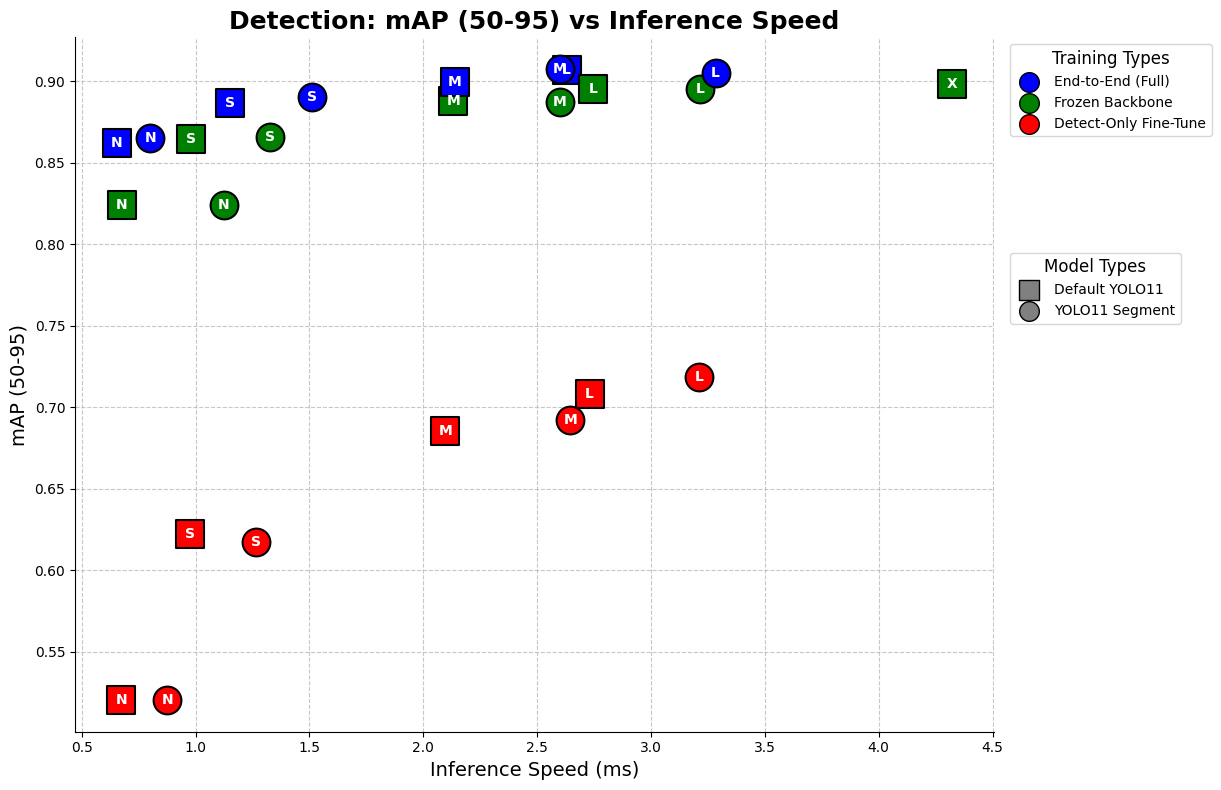

In [16]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Extract data into a list of dictionaries
data = []
for model_name, metrics in detect_metrics.items():
    # if "YOLO11x" in model_name:
    #     continue
    data.append({
        "Model": model_name,
        "mAP (50-95)": metrics["mAP (50-95)"],
        "Inference Speed": metrics["inference_speed"]
    })

# Convert to a DataFrame
df = pd.DataFrame(data)

# Define training type colors
training_type_colors = {
    "-full": "blue",
    "-freeze-backbone": "green",
    "-freeze-all": "red"
}

# Define a mapping for encircled letters
model_size_map = {
    "yolo11n": "N",
    "yolo11s": "S",
    "yolo11m": "M",
    "yolo11l": "L",
    "yolo11x": "X"
}

# Extract model size, training type, and model type (default vs segmentation) into separate columns
df["Model Size"] = df["Model"].apply(lambda x: next(
    (size for size in model_size_map.keys() if size.upper() in x.upper()), "unknown"
))
df["Training Type"] = df["Model"].apply(lambda x: next(
    (typ for typ in training_type_colors.keys() if typ in x), "unknown"
))
df["Model Type"] = df["Model"].apply(lambda x: "Segmentation" if "-seg" in x.lower() else "Default")

# Create the scatter plot
plt.figure(figsize=(12, 8))

# Plot each point with custom markers and training type colors
for i in range(len(df)):
    size = df["Model Size"].iloc[i]
    train_type = df["Training Type"].iloc[i]
    model_type = df["Model Type"].iloc[i]
    label = model_size_map.get(size, "?")  # Get the letter for the model size
    color = training_type_colors.get(train_type, "gray")  # Get the color for the training type

    # Choose a circle for segmentation and a square for default YOLO11 models
    marker = "o" if model_type == "Segmentation" else "s"

    # Draw the marker
    plt.scatter(
        df["Inference Speed"].iloc[i],
        df["mAP (50-95)"].iloc[i],
        color=color,
        s=400,  # Size of the marker
        edgecolor="black",  # Marker border color
        linewidth=1.5,
        marker=marker,  # Circle or square
        zorder=2
    )

    # Add the letter label inside the marker
    plt.text(
        df["Inference Speed"].iloc[i],
        df["mAP (50-95)"].iloc[i],
        label,  # The encircled letter
        fontsize=10,
        fontweight="bold",
        color="white",
        ha="center",
        va="center",
        zorder=3
    )

# Custom labels for training types
def custom_training_label(train_type):
    if train_type == "-full":
        return "End-to-End (Full)"
    elif train_type == "-freeze-backbone":
        return "Frozen Backbone"
    else:
        return "Detect-Only Fine-Tune"


# Add a legend for training types
legend1_handles = [
    plt.scatter([], [], color=color, s=200, label=f"{custom_training_label(train_type)}", edgecolor="black")
    for train_type, color in training_type_colors.items()
]
legend1 = plt.legend(
    handles=legend1_handles, title="Training Types", fontsize=10, title_fontsize=12, loc="upper left",
    bbox_to_anchor=(1.01, 1)  # Position outside the plot, to the right
)
plt.gca().add_artist(legend1)  # Add the first legend manually

# Add a separate legend for model types
legend2_handles = [
    plt.scatter([], [], color="gray", s=200, marker="s", label="Default YOLO11", edgecolor="black"),
    plt.scatter([], [], color="gray", s=200, marker="o", label="YOLO11 Segment", edgecolor="black")
]
plt.legend(
    handles=legend2_handles, title="Model Types", fontsize=10, title_fontsize=12, loc="upper left",
    bbox_to_anchor=(1.01, 0.7)  # Position outside the plot, below the first legend
)

# Add labels, title, and grid
plt.title("Detection: mAP (50-95) vs Inference Speed", fontsize=18, weight="bold")
plt.xlabel("Inference Speed (ms)", fontsize=14)
plt.ylabel("mAP (50-95)", fontsize=14)
plt.grid(axis="both", linestyle="--", alpha=0.7)

# Clean up spines for aesthetics
sns.despine()

# Adjust layout to prevent clipping of the legends
plt.subplots_adjust(right=0.8)  # Adjust the right side of the plot to make space for legends

# Show the plot
plt.tight_layout()
plt.show()

In [13]:
# Sort the DataFrame by mAP and inference speed for better readability
df_sorted = df.sort_values(by=["mAP (50-95)", "Inference Speed"], ascending=[False, True])

# Display the DataFrame as a styled table
styled_table = df_sorted.style.set_table_styles(
    [{"selector": "thead th", "props": [("font-weight", "bold")]}]
).set_properties(**{"text-align": "center"}) \
 .set_caption("YOLO11 Models: mAP (50-95) and Inference Speed") \
 .format({"mAP (50-95)": "{:.2f}", "Inference Speed": "{:.1f}"})

# Save to HTML or display
styled_table.to_html("metric_scores/detect_metrics_table.html")  # Save to an HTML file
styled_table  # Display in a notebook environment


,Model,mAP (50-95),Inference Speed,Model Size,Training Type,Model Type
19,YOLO11m-seg-full,0.91,2.6,yolo11m,-full,Segmentation
15,YOLO11l-full,0.91,2.6,yolo11l,-full,Default
22,YOLO11l-seg-full,0.91,3.3,yolo11l,-full,Segmentation
4,YOLO11m-full,0.90,2.1,yolo11m,-full,Default
24,YOLO11x-freeze-backbone,0.90,4.3,unknown,-freeze-backbone,Default
21,YOLO11l-freeze-backbone,0.90,2.7,yolo11l,-freeze-backbone,Default
10,YOLO11l-seg-freeze-backbone,0.89,3.2,yolo11l,-freeze-backbone,Segmentation
2,YOLO11s-seg-full,0.89,1.5,yolo11s,-full,Segmentation
1,YOLO11m-freeze-backbone,0.89,2.1,yolo11m,-freeze-backbone,Default
20,YOLO11m-seg-freeze-backbone,0.89,2.6,yolo11m,-freeze-backbone,Segmentation


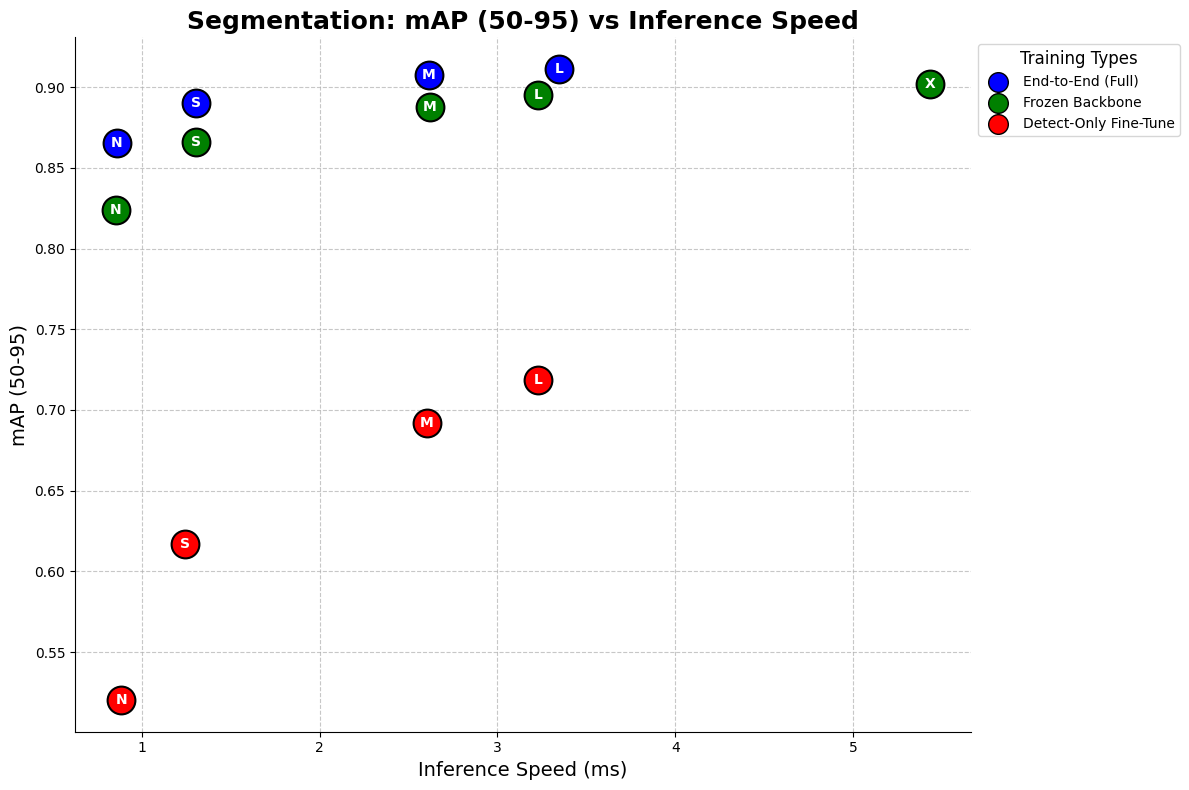

: 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Extract data into a list of dictionaries
data = []
for model_name, metrics in segment_metrics.items():
    data.append({
        "Model": model_name,
        "mAP (50-95)": metrics["mAP (50-95)"],
        "Inference Speed": metrics["inference_speed"]
    })

# Convert to a DataFrame
df = pd.DataFrame(data)

# Define training type colors
training_type_colors = {
    "-full": "blue",
    "-freeze-backbone": "green",
    "-freeze-all": "red"
}

# Define a mapping for encircled letters
model_size_map = {
    "yolo11n": "N",
    "yolo11s": "S",
    "yolo11m": "M",
    "yolo11l": "L",
    "yolo11x": "X"
}

# Extract model size and training type into separate columns
df["Model Size"] = df["Model"].apply(lambda x: next(
    (size for size in model_size_map.keys() if size.upper() in x.upper()), "unknown"
))
df["Training Type"] = df["Model"].apply(lambda x: next(
    (typ for typ in training_type_colors.keys() if typ in x), "unknown"
))

# Create the scatter plot
plt.figure(figsize=(12, 8))

# Plot each point with custom encircled letters and training type colors
for i in range(len(df)):
    size = df["Model Size"].iloc[i]
    train_type = df["Training Type"].iloc[i]
    label = model_size_map.get(size, "?")  # Get the letter for the model size
    color = training_type_colors.get(train_type, "gray")  # Get the color for the training type

    # Draw the encircled letter
    plt.scatter(
        df["Inference Speed"].iloc[i],
        df["mAP (50-95)"].iloc[i],
        color=color,
        s=400,  # Size of the circle
        edgecolor="black",  # Circle border color
        linewidth=1.5,
        zorder=2
    )
    plt.text(
        df["Inference Speed"].iloc[i],
        df["mAP (50-95)"].iloc[i],
        label,  # The encircled letter
        fontsize=10,
        fontweight="bold",
        color="white",
        ha="center",
        va="center",
        zorder=3
    )

# Add a legend for training type
for train_type, color in training_type_colors.items():
    if train_type == "-full":
        train_type = "End-to-End (Full)"
    elif train_type == "-freeze-backbone":
        train_type = "Frozen Backbone"
    else:
        train_type = "Detect-Only Fine-Tune"
    plt.scatter([], [], color=color, s=200, label=f"{train_type}", edgecolor="black")

# Add labels, title, and grid
plt.title("Segmentation: mAP (50-95) vs Inference Speed", fontsize=18, weight="bold")
plt.xlabel("Inference Speed (ms)", fontsize=14)
plt.ylabel("mAP (50-95)", fontsize=14)
plt.grid(axis="both", linestyle="--", alpha=0.7)

# Add legend
plt.legend(title="Training Types", fontsize=10, title_fontsize=12, loc="best", bbox_to_anchor=(1, 1))

# Clean up spines for aesthetics
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

In [15]:
# Sort the DataFrame by mAP and inference speed for better readability
df_sorted = df.sort_values(by=["mAP (50-95)", "Inference Speed"], ascending=[False, True])

# Drop the "Model Size" and "Training Type" columns
df_sorted = df_sorted.drop(columns=["Model Size", "Training Type"])

# Display the DataFrame as a styled table
styled_table = df_sorted.style.set_table_styles(
    [{"selector": "thead th", "props": [("font-weight", "bold")]}]
).set_properties(**{"text-align": "center"}) \
 .set_caption("YOLO11 Models: mAP (50-95) and Inference Speed") \
 .format({"mAP (50-95)": "{:.2f}", "Inference Speed": "{:.1f}"})

# Save to HTML or display
styled_table.to_html("metric_scores/segment_metrics_table.html")  # Save to an HTML file
styled_table  # Display in a notebook environment


,Model,mAP (50-95),Inference Speed
11,YOLO11l-seg-full,0.91,3.3
9,YOLO11m-seg-full,0.91,2.6
12,YOLO11x-seg-freeze-backbone,0.90,5.4
5,YOLO11l-seg-freeze-backbone,0.89,3.2
1,YOLO11s-seg-full,0.89,1.3
10,YOLO11m-seg-freeze-backbone,0.89,2.6
7,YOLO11s-seg-freeze-backbone,0.87,1.3
6,YOLO11n-seg-full,0.87,0.9
4,YOLO11n-seg-freeze-backbone,0.82,0.9
3,YOLO11l-seg-freeze-all,0.72,3.2
